In [1]:
import math
import numpy as np
from lib import FastGradientMethod
from lib import SinkhornMethod
from lib import Experiments

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fastgrad(C, p, q, gamma=0.1, eps=0.01, log=False):
    fgm = FastGradientMethod(gamma, n=p.shape[0], epsilon=eps, log=log)
    x, iterations_num = fgm.fit(C, p, q)
    return x, iterations_num, 0

def sinkhorn(C, p, q, gamma=0.1, eps=0.01, log=False):
    sm = SinkhornMethod(gamma, n=p.shape[0], epsilon=eps, log=log)
    x, inner_iterations_num, outer_iterations_num = sm.fit(C, p, q)
    return x, inner_iterations_num, outer_iterations_num

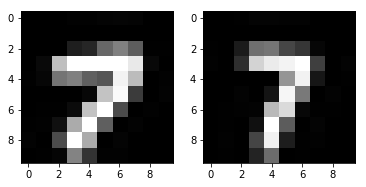

In [3]:
C, p, q = Experiments.load_data('1.png', '2.png')

–––––––––––––––––––––––––––––
Algorithm configuration:
gamma = 0.1
eps = 0.01
–––––––––––––––––––––––––––––

Iteration 100: metric = 0.0315 > 0.01
Iteration 200: metric = 0.0112 > 0.01
Iteration 232: metric = 0.0099 < 0.01


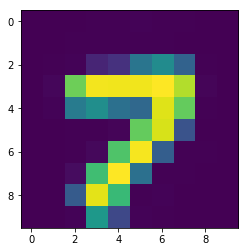

In [4]:
x, iterations_num, _ = fastgrad(C, p, q, log=True)
Experiments.visualize_x(x, p.shape[0])

–––––––––––––––––––––––––––––
Algorithm configuration:
gamma = 1
eps = 0.01
eps with ~ = 0.0007
eps prox = 0.001
–––––––––––––––––––––––––––––

Inner iteration 20: metric (one) = 0.0003 > 0.01 or metric (two) = -0.0013 > 0.0001
Inner iteration 20: metric (one) = 0.0003 < 0.01 and metric (two) = -0.0013 < 0.0001
– Outer iteration 0: metric = 0.044 > 0.001
Inner iteration 20: metric (one) = 0.0002 > 0.01 or metric (two) = 0.0001 > 0.0003
Inner iteration 20: metric (one) = 0.0002 < 0.01 and metric (two) = 0.0001 < 0.0003
– Outer iteration 1: metric = 0.0189 > 0.001
Inner iteration 20: metric (one) = 0.0005 > 0.01 or metric (two) = -0.0004 > 0.0004
Inner iteration 20: metric (one) = 0.0005 < 0.01 and metric (two) = -0.0004 < 0.0004
– Outer iteration 2: metric = 0.0123 > 0.001
Inner iteration 20: metric (one) = 0.0005 > 0.01 or metric (two) = -0.0006 > 0.0004
Inner iteration 20: metric (one) = 0.0005 < 0.01 and metric (two) = -0.0006 < 0.0004
– Outer iteration 3: metric = 0.0061 > 0.001
Inn

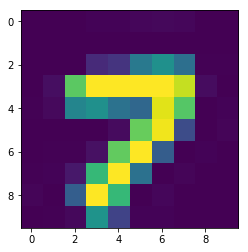

In [5]:
x, inner_iterations_num, outer_iterations_num = sinkhorn(C, p, q, gamma=1, log=True)
Experiments.visualize_x(x, p.shape[0])

In [ ]:
epsilons, gammas, iterations = Experiments.test(C, p, q, 
                                                config={'eps': (0.01, 0.01, 1), 
                                                        'gamma': (10, 1, 2)},
                                                methods=[fastgrad, sinkhorn])

In [15]:
iterations

array([[[ 87, 101, 121, 150, 191, 248, 330],
        [ 37,  51,  71, 100, 141, 198, 280]]])

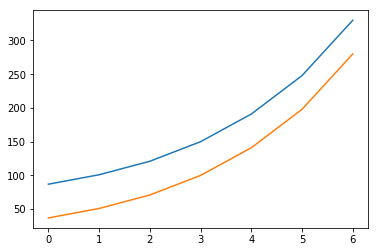

In [25]:
plt.plot(iterations[0].T)